<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/cropLeaves_classificationTFlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting to the google drive


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Extracting the images from the zipfile


In [5]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/crop_leaves.zip','r') as zipObj:
     zipObj.extractall('Crop leaves')

Install split folders package to split the folders

In [6]:
!pip install split-folders[full]

Spliting the folders into testing, validation and training datasets

In [7]:
import splitfolders
input_folder = '/content/Crop leaves/crop_leaves'
splitfolders.ratio(input_folder,output ="dataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)

Copying files: 21593 files [00:22, 958.99 files/s] 


Importing the necessary libraries

In [8]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

Initializing and declaring the variables

In [11]:
IMAGE_SIZE = 256
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS =10

Loading the images to the dataset

In [14]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/Crop leaves/crop_leaves")

Found 21592 files belonging to 7 classes.


In [16]:
class_names = dataset.class_names
class_names

['Potato leaves',
 'Rice leaves',
 'Tea leaves',
 'Tomato leaves',
 'non leaves',
 'pepper leaves',
 'unknown_Leaves']

In [17]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    rotation_range=10)
train_generator = train_datagen.flow_from_directory('/content/dataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )


Found 15111 images belonging to 7 classes.


In [18]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/dataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 2156 images belonging to 7 classes.


In [19]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/dataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 4325 images belonging to 7 classes.


In [20]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =7
base_model = tf.keras.applications.MobileNetV2(
    input_shape = input_shape,
    include_top=False,
    weights='imagenet',

)

for layer in base_model.layers:
    layer.trainable = False
#x = layers.Flatten()(x)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

9406464/9406464 [==============================] - 1s 0us/step


In [21]:
model.compile(
  optimizer = 'RMSprop',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [22]:
history = model.fit(

    train_generator,
    steps_per_epoch= 118,
    batch_size =BATCH_SIZE,
    validation_data= validation_generator,
    validation_steps =17,
    verbose=1,
    epochs =10
)

Epoch 1/10
118/118 [==============================] - 351s 3s/step - loss: 0.1000 - accuracy: 0.9690 - val_loss: 0.0099 - val_accuracy: 0.9968
Epoch 2/10
118/118 [==============================] - 333s 3s/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0078 - val_accuracy: 0.9968
Epoch 3/10
118/118 [==============================] - 366s 3s/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0110 - val_accuracy: 0.9972
Epoch 4/10
118/118 [==============================] - 363s 3s/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0031 - val_accuracy: 0.9986
Epoch 5/10
118/118 [==============================] - 323s 3s/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0215 - val_accuracy: 0.9944
Epoch 6/10
118/118 [==============================] - 325s 3s/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 7/10
118/118 [==============================] - 322s 3s/step - loss: 9.1976e-04 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.

In [23]:
scores = model.evaluate(test_generator,verbose=0)
scores

[0.0039028546307235956, 0.998381495475769]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

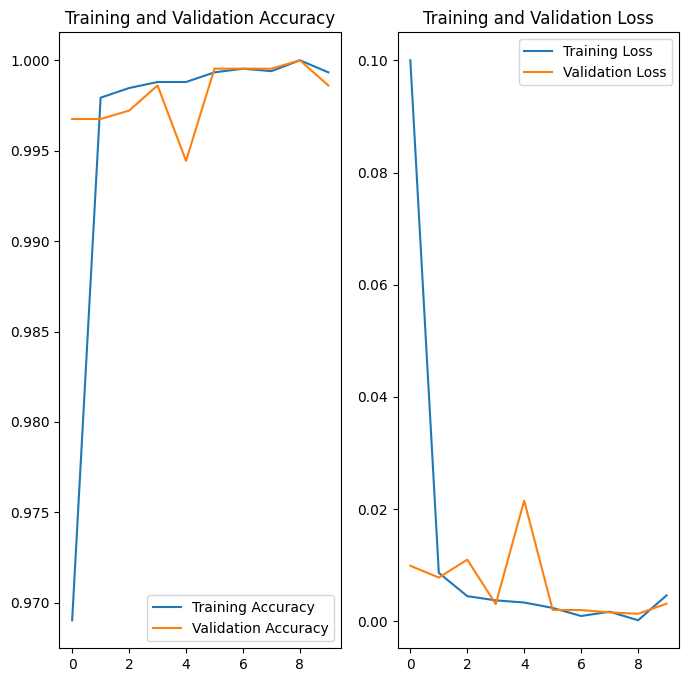

In [25]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  unknown_Leaves
4/4 [==============================] - 0s 64ms/step
Predicted label:  unknown_Leaves


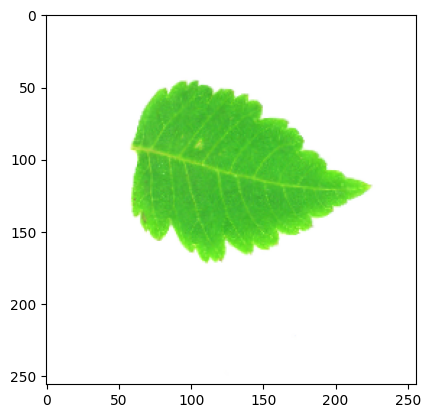

In [29]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [30]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


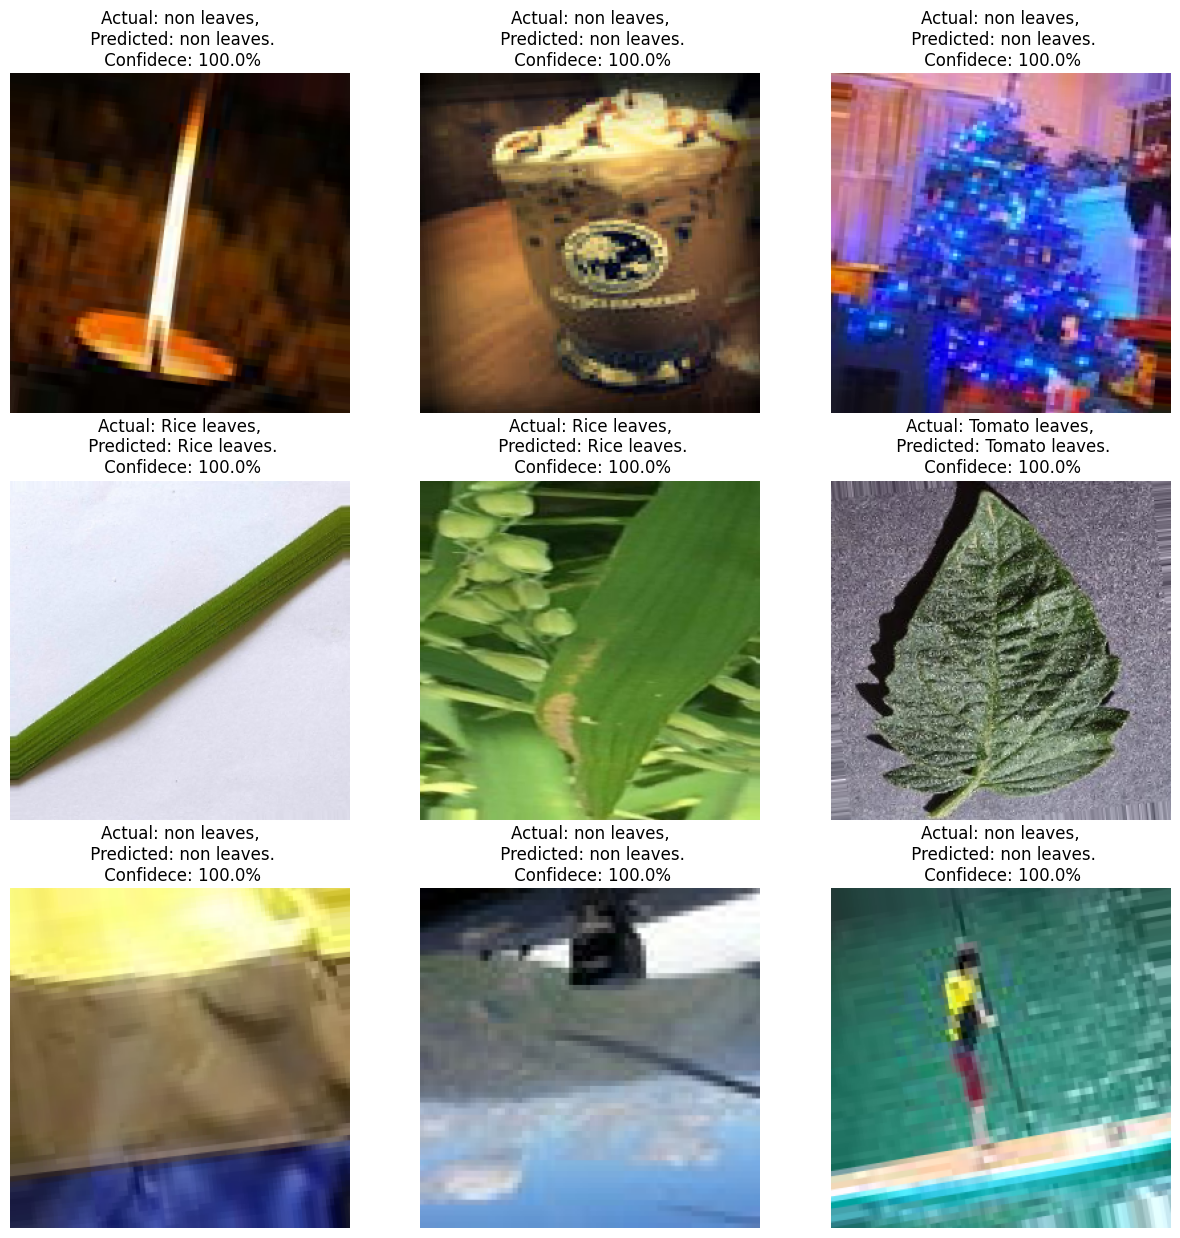

In [31]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [32]:
model.save("/content/gdrive/MyDrive/Rice_disease_classification_models/trained_model_cropleavesv1.h5")

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [34]:
with open('/content/gdrive/MyDrive/Rice_disease_classification_models/tflite_model_cropleaves_v1.tflite', 'wb') as f:
   f.write(tflite_quant_model)

In [35]:
import numpy

In [36]:
test_images = []
test_labels = []
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [37]:
def evaluate(interpreter):
  prediction= []
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  input_format = interpreter.get_output_details()[0]['dtype']

  for i, test_image in enumerate(test_images):
    if i % 100 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    test_image = np.expand_dims(test_image, axis=0).astype(input_format)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()
    output = interpreter.tensor(output_index)
    predicted_label = np.argmax(output()[0])
    prediction.append(predicted_label)

  print('\n')
  # Comparing prediction results with ground truth labels to calculate accuracy.
  prediction = np.array(prediction)
  accuracy = (prediction == test_labels).mean()
  return accuracy

In [38]:
# Passing the Integer Quantized TF Lite model to the Interpreter.
interpreter = tf.lite.Interpreter('/content/gdrive/MyDrive/Rice_disease_classification_models/tflite_model_cropleaves_v1.tflite')
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test images.
test_accuracy = evaluate(interpreter)
print('Quantized TFLite Model Test Accuracy:', test_accuracy*100)
##print('Baseline Keras Model Test Accuracy:', scores*100)

Evaluated on 0 results so far.
Evaluated on 100 results so far.
Evaluated on 200 results so far.
Evaluated on 300 results so far.
Evaluated on 400 results so far.
Evaluated on 500 results so far.
Evaluated on 600 results so far.
Evaluated on 700 results so far.
Evaluated on 800 results so far.
Evaluated on 900 results so far.
Evaluated on 1000 results so far.
Evaluated on 1100 results so far.
Evaluated on 1200 results so far.
Evaluated on 1300 results so far.
Evaluated on 1400 results so far.
Evaluated on 1500 results so far.
Evaluated on 1600 results so far.
Evaluated on 1700 results so far.
Evaluated on 1800 results so far.
Evaluated on 1900 results so far.
Evaluated on 2000 results so far.
Evaluated on 2100 results so far.
Evaluated on 2200 results so far.
Evaluated on 2300 results so far.
Evaluated on 2400 results so far.
Evaluated on 2500 results so far.
Evaluated on 2600 results so far.
Evaluated on 2700 results so far.
Evaluated on 2800 results so far.
Evaluated on 2900 results 